## Imports

In [5]:
import pandas as pd
import os
import zipfile
import sqlite3
import numpy as np

## Download arquivos do ENADE

In [3]:
!wget https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip

!wget https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2018.zip

!wget https://download.inep.gov.br/microdados/Enade_Microdados/microdados_Enade_2017_portal_2018.10.09.zip

--2021-11-28 17:23:03--  https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33866093 (32M) [application/zip]
Saving to: ‘microdados_enade_2019.zip’

microdados_enade_20 100%[===================>]  32.30M  3.62MB/s    in 8.8s    

2021-11-28 17:23:14 (3.67 MB/s) - ‘microdados_enade_2019.zip’ saved [33866093/33866093]

--2021-11-28 17:23:14--  https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2018.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45904764 (44M) [application/zip]
Saving to: ‘microdados_enade_2018.zip’

microdados_enade_20 100%[=========

## Descompacta os arquivos

In [6]:
zip_files = list()

for file in os.listdir("."):
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_ref:
            zip_ref.extractall(".")

## Coloca todos os arquivos em uma mesma pasta

In [6]:
os.rename("2018/3.DADOS/microdados_enade_2018.txt", "3.DADOS/microdados_enade_2018.txt")

FileNotFoundError: [Errno 2] No such file or directory: '2018/3.DADOS/microdados_enade_2018.txt' -> '3.DADOS/microdados_enade_2018.txt'

## Lê as tabelas de dados

In [7]:
df_2017 = pd.read_csv("3.DADOS/MICRODADOS_ENADE_2017.txt", sep=";")
df_2017.head(2)

/home/ialvarenga/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (29,31,32,44,45,46,47,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_2018 = pd.read_csv("3.DADOS/microdados_enade_2018.txt", sep=";")
df_2018.head(2)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [9]:
df_2019 = pd.read_csv("3.DADOS/microdados_enade_2019.csv", sep=";")
df_2019.head(2)

/home/ialvarenga/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (48,49,50,51,52,53,57,58,59,84,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,...,2.0,5.0,1.0,1.0,2.0,5.0,8.0,7.0,1.0,2.0
1,2019,1,10002,10028,5710,3,1,5103403,51,5,...,1.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0


## Seleciona variáveis interessantes

In [10]:
df_2017 = df_2017[["NU_ANO", "CO_CATEGAD", "CO_MODALIDADE", "CO_CURSO", "CO_UF_CURSO", "NU_IDADE", "TP_SEXO", "ANO_FIM_EM", "ANO_IN_GRAD", "CO_TURNO_GRADUACAO", "TP_PRES"]]

df_2018 = df_2018[["NU_ANO", "CO_CATEGAD", "CO_MODALIDADE", "CO_CURSO", "CO_UF_CURSO", "NU_IDADE", "TP_SEXO", "ANO_FIM_EM", "ANO_IN_GRAD", "CO_TURNO_GRADUACAO", "TP_PRES"]]

df_2019 = df_2019[["NU_ANO", "CO_CATEGAD", "CO_MODALIDADE", "CO_CURSO", "CO_UF_CURSO", "NU_IDADE", "TP_SEXO", "ANO_FIM_EM", "ANO_IN_GRAD", "CO_TURNO_GRADUACAO", "TP_PRES"]]

### Concatena os dataframes

In [11]:
dfs = [df_2017, df_2018, df_2019]

enade_df = pd.concat(dfs, axis=0)

enade_df.head(2)

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,F,2007.0,2012.0,3.0,555.0
1,2017,1,1,3,51,23,F,2013.0,2013.0,3.0,555.0


In [12]:
enade_df.shape

(1519493, 11)

In [13]:
enade_df.isna().sum()

NU_ANO                    0
CO_CATEGAD                0
CO_MODALIDADE             0
CO_CURSO                  0
CO_UF_CURSO               0
NU_IDADE                  0
TP_SEXO                   0
ANO_FIM_EM               71
ANO_IN_GRAD             443
CO_TURNO_GRADUACAO    24216
TP_PRES                  11
dtype: int64

In [14]:
enade_df = enade_df.dropna()
enade_df.head(2)

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,F,2007.0,2012.0,3.0,555.0
1,2017,1,1,3,51,23,F,2013.0,2013.0,3.0,555.0


In [15]:
enade_df.shape

(1495270, 11)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

sex_lb_enc = le.fit_transform(enade_df["TP_SEXO"])

enade_df["TP_SEXO"] = sex_lb_enc

In [18]:
enade_df.head(2)

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,0,2007.0,2012.0,3.0,555.0
1,2017,1,1,3,51,23,0,2013.0,2013.0,3.0,555.0


In [19]:
enade_df.dtypes

NU_ANO                  int64
CO_CATEGAD              int64
CO_MODALIDADE           int64
CO_CURSO                int64
CO_UF_CURSO             int64
NU_IDADE                int64
TP_SEXO                 int64
ANO_FIM_EM            float64
ANO_IN_GRAD           float64
CO_TURNO_GRADUACAO    float64
TP_PRES               float64
dtype: object

In [20]:
enade_df = enade_df.astype({"ANO_FIM_EM": np.int32, "ANO_IN_GRAD": np.int32, "CO_TURNO_GRADUACAO": np.int32, "TP_PRES": np.int32})

In [21]:
enade_df.TP_PRES.unique()

array([555, 222, 444, 334, 888, 556, 333], dtype=int32)

In [22]:
enade_df = enade_df.query("TP_PRES == 222 | TP_PRES == 555 | TP_PRES == 556")
enade_df.head()

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,0,2007,2012,3,555
1,2017,1,1,3,51,23,0,2013,2013,3,555
2,2017,1,1,3,51,23,1,2011,2013,3,555
3,2017,1,1,3,51,23,1,2011,2013,3,555
4,2017,1,1,3,51,24,1,2010,2013,3,555


In [23]:
enade_df.TP_PRES = enade_df.TP_PRES.apply(lambda x: 0 if x == 222 else 1)

In [24]:
enade_df.head()

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,0,2007,2012,3,1
1,2017,1,1,3,51,23,0,2013,2013,3,1
2,2017,1,1,3,51,23,1,2011,2013,3,1
3,2017,1,1,3,51,23,1,2011,2013,3,1
4,2017,1,1,3,51,24,1,2010,2013,3,1


## Cria o banco e as tabelas

In [20]:
conn = None

try:
    conn = sqlite3.connect("database.db")
    print(sqlite3.version)
except Exception as e:
    print(e)

2.6.0


In [21]:
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Exception as e:
        print(e)

In [22]:
def insert_into(conn, query, values):
    try:
        c = conn.cursor()
        c.execute(query, values)
        
    except Exception as e:
        print(e)    

In [23]:
# define tabelas de dimensão
create_table_ano = "CREATE TABLE IF NOT EXISTS dim_ano (ano_enade integer primary key)"
create_table_codigo_categoria = "CREATE TABLE IF NOT EXISTS dim_codigo_categoria (cod_cat integer primary key)"
create_table_codigo_modalidade = "CREATE TABLE IF NOT EXISTS dim_cod_mod (cod_mol integer primary key)"
create_table_codigo_curso = "CREATE TABLE IF NOT EXISTS dim_cod_curso (cod_curso integer primary key)"
create_table_codigo_uf_curso = "CREATE TABLE IF NOT EXISTS dim_cod_uf_curso (cod_uf_curso integer primary key)"
create_table_idade = "CREATE TABLE IF NOT EXISTS dim_idade (idade integer primary key)"
create_table_sexo = "CREATE TABLE IF NOT EXISTS dim_sexo (sexo integer primary key)"
create_table_ano_fim_ensino_medio = "CREATE TABLE IF NOT EXISTS dim_fm_em (ano_fm_em integer primary key)"
create_table_ano_inicio_graduacao = "CREATE TABLE IF NOT EXISTS dim_ini_grad (ano_ini_grad integer primary key)"
create_table_codigo_turno_graduacao = "CREATE TABLE IF NOT EXISTS dim_turno_grad (turno_grad integer primary key)"
# define tabela fato
create_table_fato_presenca = """ CREATE TABLE IF NOT EXISTS fato_presenca (
                                id int primary key,
                                presente int not null,
                                ano_enade int not null,
                                cod_cat int not null,
                                cod_mol int not null,
                                cod_curso int not null,
                                cod_uf_curso int not null,
                                idade int not null,
                                sexo int not null,
                                ano_fm_em int not null,
                                ano_ini_grad int not null,
                                turno_grad int not null,
                                FOREIGN KEY (ano_enade) REFERENCES dim_ano (ano_enade),
                                FOREIGN KEY (cod_cat) REFERENCES dim_codigo_categoria (cod_cat),
                                FOREIGN KEY (cod_mol) REFERENCES dim_cod_mod (cod_mol),
                                FOREIGN KEY (cod_curso) REFERENCES dim_cod_curso (cod_curso),
                                FOREIGN KEY (cod_uf_curso) REFERENCES dim_cod_uf_curso (cod_uf_curso),
                                FOREIGN KEY (idade) REFERENCES dim_idade (idade),
                                FOREIGN KEY (sexo) REFERENCES dim_sexo (sexo),
                                FOREIGN KEY (ano_fm_em) REFERENCES dim_fm_em (ano_fm_em),
                                FOREIGN KEY (ano_ini_grad) REFERENCES dim_ini_grad (ano_ini_grad),
                                FOREIGN KEY (turno_grad) REFERENCES dim_turno_grad (turno_grad)
)"""

In [31]:
create_table(conn, create_table_ano)
create_table(conn, create_table_codigo_categoria)
create_table(conn, create_table_codigo_modalidade)
create_table(conn, create_table_codigo_curso)
create_table(conn, create_table_codigo_uf_curso)
create_table(conn, create_table_idade)
create_table(conn, create_table_sexo)
create_table(conn, create_table_ano_fim_ensino_medio)
create_table(conn, create_table_ano_inicio_graduacao)
create_table(conn, create_table_codigo_turno_graduacao)

create_table(conn, create_table_fato_presenca)

## Popular o banco

In [42]:
insert_ano = "insert or replace into dim_ano (ano_enade) values (?)"
insert_cod_cat = "insert or replace into dim_codigo_categoria values (?)"
insert_cod_mod = "insert or replace into dim_cod_mod values (?)"
insert_cod_curso = "insert or replace into dim_cod_curso values (?)"
insert_cod_uf_curso = "insert or replace into dim_cod_uf_curso values (?)"
insert_idade = "insert or replace into dim_idade values (?)"
insert_sexo = "insert or replace into dim_sexo values (?)"
insert_fm_em = "insert or replace into dim_fm_em values (?)"
insert_ini_grad = "insert or replace into dim_turno_grad values (?)"

insert_presenca = "insert or replace into fato_presenca (id, ano_enade, cod_cat, cod_mol, cod_curso, cod_uf_curso, idade, sexo, ano_fm_em, ano_ini_grad, turno_grad, presente) values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

### popular tabelas

In [44]:
def insert_values(col_name, query):
    
    print(query)
    items = enade_df[col_name].unique()

    for value in items:

        insert_into(conn, query, (int(value),))

In [45]:
cols = enade_df.columns
queries = [insert_ano, insert_cod_cat, insert_cod_mod, insert_cod_curso, insert_cod_uf_curso, insert_idade, insert_sexo, insert_fm_em, insert_ini_grad]

In [46]:
len(queries)

9

In [49]:
for i in range(len(queries)):

    insert_values(cols[i], queries[i])

    conn.commit()

insert or replace into dim_ano (ano_enade) values (?)
insert or replace into dim_codigo_categoria values (?)
insert or replace into dim_cod_mod values (?)
insert or replace into dim_cod_curso values (?)
insert or replace into dim_cod_uf_curso values (?)
insert or replace into dim_idade values (?)
insert or replace into dim_sexo values (?)
insert or replace into dim_fm_em values (?)
insert or replace into dim_turno_grad values (?)


In [43]:
i = 1

for tp in enade_df.itertuples(index=False, name=None):
    
    a = tuple([i])
    values = a + tp

    print(values)
    insert_into(conn, insert_presenca, values)
    

(1, 2017, 1, 1, 3, 51, 26, 0, 2007, 2012, 3, 1)


## Análise

In [23]:
enade_df.head()

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,0,2007,2012,3,1
1,2017,1,1,3,51,23,0,2013,2013,3,1
2,2017,1,1,3,51,23,1,2011,2013,3,1
3,2017,1,1,3,51,23,1,2011,2013,3,1
4,2017,1,1,3,51,24,1,2010,2013,3,1


In [34]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [27]:
group_by_year = enade_df.groupby("NU_ANO").sum()

In [29]:
group_by_year

,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
NU_ANO,,,,,,,,,,
2017,1786447,418577,199744043470,18033809,15580024,243098,1069511437,1072713326,1762198,450239
2018,4357823497,644247,180940864747,18872757,16068409,222251,1099453018,1102754445,1836404,462244
2019,3531471814,409607,215007529011,13593393,11157095,185512,823544646,825143214,1266128,371463


<AxesSubplot:xlabel='NU_ANO', ylabel='TP_PRES'>

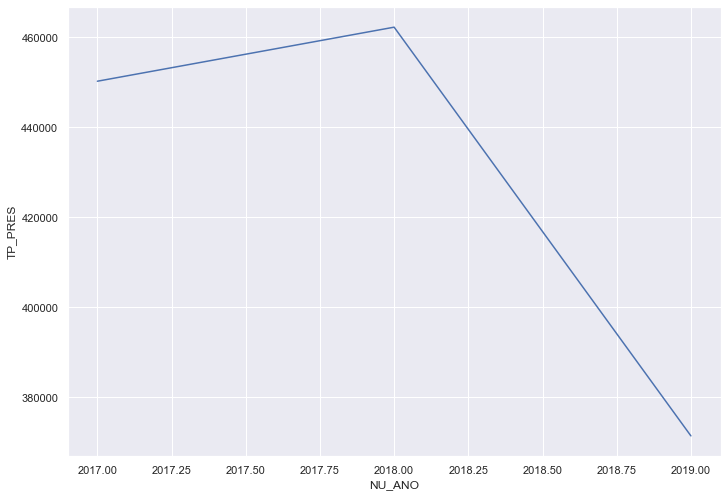

In [35]:
sns.lineplot(data=group_by_year, x="NU_ANO", y="TP_PRES")

Aqui conseguimos observar que o número de candidatos que compareceu as provas teve um leve aumento em 2018, no entanto, em 2019 houve uma queda brusca de pessoas que realizaram a prova.

C:\Users\Visagio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO_TURNO_GRADUACAO', ylabel='Density'>

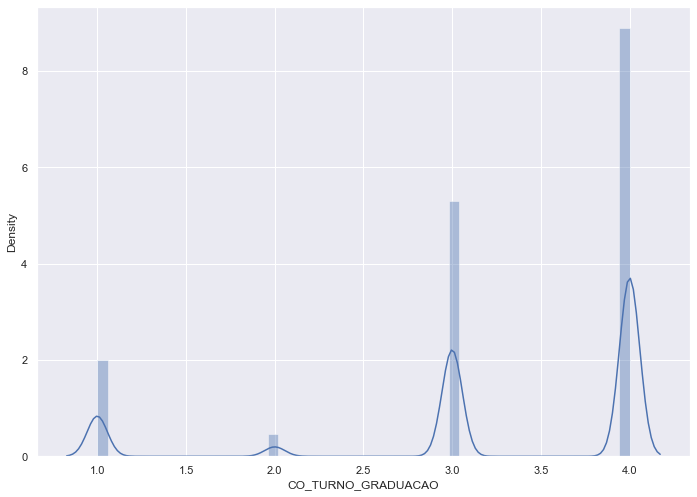

In [36]:
sns.distplot(enade_df["CO_TURNO_GRADUACAO"])

Aqui observamos que a maior parte das pessoas que compareceram para a realização da prova são do turno noturno, o que pode ser um reflexo de faculdades particulares possuírem mais alunos noturnos que trabalham pela manhã e tem interese em se formar fazendo um curso a noite

C:\Users\Visagio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TP_SEXO', ylabel='Density'>

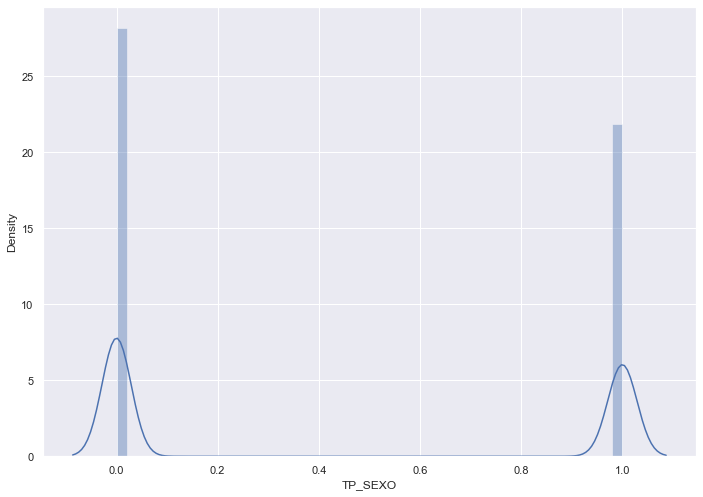

In [38]:
sns.distplot(enade_df["TP_SEXO"])

A partir desta análise observamos que a maior parte dos alunos que vão realizar a prova são mulheres 0.

## Aprendizado

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
enade_df.head(2)

,NU_ANO,CO_CATEGAD,CO_MODALIDADE,CO_CURSO,CO_UF_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_PRES
0,2017,1,1,3,51,26,0,2007,2012,3,1
1,2017,1,1,3,51,23,0,2013,2013,3,1


In [28]:
enade_df.shape

(1489931, 11)

In [29]:
X = enade_df.iloc[:, :-1]
print(X.head(2))
y = enade_df.iloc[:, 10]
print(y.head(2))

   NU_ANO  CO_CATEGAD  CO_MODALIDADE  CO_CURSO  CO_UF_CURSO  NU_IDADE  \
0    2017           1              1         3           51        26   
1    2017           1              1         3           51        23   

   TP_SEXO  ANO_FIM_EM  ANO_IN_GRAD  CO_TURNO_GRADUACAO  
0        0        2007         2012                   3  
1        0        2013         2013                   3  
0    1
1    1
Name: TP_PRES, dtype: int64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [34]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [35]:
pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, pred)

0.8616751737491904

Aqui utilizamos um modelo de classificação para tentar prever se o candidado iria comparecer ou não a prova baseado nos campos que mantivemos

## Ferramentas Utilizadas

- Foi utilizado apenas o python para todo o processo de processamento e integração, o python é uma linguagem robusta e com uma comunidade forte que contribui bastante para a criação de materiais, além de dar suporte para dúvidas e erros de código
- O SQLite3 foi utilizado como banco por ser um banco leve e de fácil manipulação